In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
from google.colab import drive
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
from statsmodels.stats.anova import anova_lm

drive.mount('/content/drive')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Mounted at /content/drive


In [ ]:
import os

print(os.listdir('/content/drive/MyDrive/Citadel Data Open 2021/data/'))

['US_States', 'Global', '.ipynb_checkpoints', 'EU']


In [ ]:
dat = pd.read_csv('/content/drive/MyDrive/Citadel Data Open 2021/DL/data/df_merged_analysis.csv')
print(dat.columns)
dat = dat.rename(mapper={'date' : 'Date'}, axis=1)
dat = dat[['statefips', 'Date', 'positiveIncrease', 'deathIncrease', 'hospitalizedIncrease', 'Rt']]
print(dat['Date'].value_counts().sort_index())

Index(['Unnamed: 0', 'statefips', 'date', 'Stringency', 'positiveIncrease',
       'deathIncrease', 'hospitalizedIncrease',
       'totalTestsPeopleViralIncrease', 'statename', 'shadow_index_normalized',
       'Rt', 'ContainmentHealthIndex'],
      dtype='object')
2020-03-07    49
2020-03-08    51
2020-03-09    51
2020-03-10    51
2020-03-11    51
              ..
2021-01-22    51
2021-01-23    51
2021-01-24    51
2021-01-25    51
2021-01-26    51
Name: Date, Length: 326, dtype: int64


In [ ]:
dir = '/content/drive/MyDrive/Citadel Data Open 2021/data/'
print(dat.columns)
mobility_dat = pd.read_csv(dir + 'US_States/cleaned_data/mobility_and_stringency.csv')
print(mobility_dat['Date'].value_counts().sort_index())
print(mobility_dat.columns)
state_dat = pd.read_csv(dir + 'US_States/State Characteristics - State Characteristics.csv')
mobility_dat = mobility_dat.merge(state_dat, on=['statefips', 'statename', 'stateabbrev'])
#merged_dat = dat.merge(mobility_dat, on=['statefips', 'Date'], indicator='_merge', how='left')
merged_dat = mobility_dat.merge(dat, on=['statefips', 'Date'], indicator='_merge', how='left')
print(merged_dat.loc[merged_dat['_merge']=='left_only', 'Date'].value_counts().sort_index())
print(merged_dat['_merge'].value_counts())
merged_dat.loc[merged_dat['_merge']=='right_only', ['Date', 'positiveIncrease', 'deathIncrease',
       'hospitalizedIncrease', 'Rt']] = np.nan
#merged_dat = merged_dat.loc[merged_dat['_merge'] == 'both']
print(merged_dat)
print(merged_dat['Date'].value_counts().sort_index())

Index(['statefips', 'Date', 'positiveIncrease', 'deathIncrease',
       'hospitalizedIncrease', 'Rt'],
      dtype='object')
2020-02-01    51
2020-02-02    51
2020-02-03    51
2020-02-04    51
2020-02-05    51
              ..
2021-02-21    51
2021-02-22    51
2021-02-23    51
2021-02-24    51
2021-02-25    51
Name: Date, Length: 391, dtype: int64
Index(['Unnamed: 0', 'statename', 'Date', 'StringencyIndex',
       'ContainmentHealthIndex', 'statefips', 'stateabbrev',
       'shadow_index_normalized'],
      dtype='object')
2020-02-01    51
2020-02-02    51
2020-02-03    51
2020-02-04    51
2020-02-05    51
              ..
2021-02-21    51
2021-02-22    51
2021-02-23    51
2021-02-24    51
2021-02-25    51
Name: Date, Length: 66, dtype: int64
both          16624
left_only      3317
right_only        0
Name: _merge, dtype: int64
       Unnamed: 0 statename        Date  ...  hospitalizedIncrease  Rt     _merge
0              31    Alaska  2020-02-01  ...                   NaN NaN  left_o

In [ ]:
print(dat.columns)
print(dat)

Index(['statefips', 'Date', 'positiveIncrease', 'deathIncrease',
       'hospitalizedIncrease', 'Rt'],
      dtype='object')
       statefips        Date  ...  hospitalizedIncrease        Rt
0              1  2020-03-07  ...                   0.0  2.058230
1              1  2020-03-08  ...                   0.0  2.035865
2              1  2020-03-09  ...                   0.0  2.005499
3              1  2020-03-10  ...                   0.0  1.978277
4              1  2020-03-11  ...                   0.0  1.939723
...          ...         ...  ...                   ...       ...
16619         56  2021-01-22  ...                   3.0  0.923943
16620         56  2021-01-23  ...                   0.0  0.925517
16621         56  2021-01-24  ...                   8.0  0.925426
16622         56  2021-01-25  ...                   5.0  0.925535
16623         56  2021-01-26  ...                   1.0  0.928096

[16624 rows x 6 columns]


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


2020-02-01    51
2020-02-02    51
2020-02-03    51
2020-02-04    51
2020-02-05    51
              ..
2021-02-21    51
2021-02-22    51
2021-02-23    51
2021-02-24    51
2021-02-25    51
Name: Date, Length: 391, dtype: int64


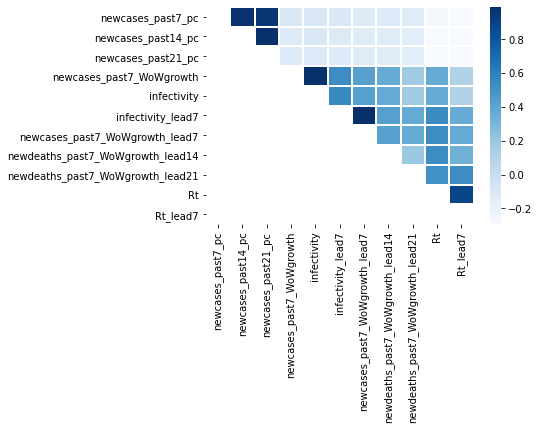

In [ ]:
### READY FOR FINAL PLOT @SHERIDAN GREEN

def create_rolling_sum(data, varname, groupby, num_periods):
  ser = data[[varname, groupby]]
  to_sum = []
  for i in range(num_periods):
    ser.loc[:,varname + '_lag_' + str(i)] = ser.groupby(groupby)[varname].shift(i)
    to_sum = to_sum + [varname + '_lag_' + str(i)]
  return ser[to_sum].sum(axis=1)

horizons = [7,14,21,28]
vars_to_avg = ['positiveIncrease', 'hospitalizedIncrease', 'deathIncrease']
new_names = ['newcases', 'newhospital', 'newdeaths']

all_vars = []
for name,var in zip(new_names, vars_to_avg):
  for h in horizons:
    merged_dat.loc[:,name+'_past'+str(h)] = create_rolling_sum(merged_dat, var, 'statefips', h)
    all_vars += [name+'_past'+str(h)]
    merged_dat[name+'_past'+str(h)+'_lag7'] = merged_dat.groupby('statefips')[name+'_past'+str(h)].shift(7)

merged_dat['newcases_past7_WoWgrowth'] = merged_dat['newcases_past7'] / merged_dat['newcases_past7_lag7']
merged_dat['newdeaths_past7_WoWgrowth'] = merged_dat['newdeaths_past7'] / merged_dat['newdeaths_past7_lag7']
merged_dat['infectivity'] = merged_dat['newcases_past7'] / merged_dat['newcases_past28_lag7']
merged_dat['newcases_past7_WoWgrowth_lead7'] = merged_dat.groupby('statefips')['newcases_past7_WoWgrowth'].shift(-7)
merged_dat['infectivity_lead7'] = merged_dat.groupby('statefips')['infectivity'].shift(-7)
merged_dat['newdeaths_past7_WoWgrowth_lead14'] = merged_dat.groupby('statefips')['newdeaths_past7_WoWgrowth'].shift(-14)
merged_dat['newdeaths_past7_WoWgrowth_lead21'] = merged_dat.groupby('statefips')['newdeaths_past7_WoWgrowth'].shift(-21)
merged_dat['Rt_lead7'] = merged_dat.groupby('statefips')['Rt'].shift(-7)

merged_dat['adherence_ratio'] = merged_dat['shadow_index_normalized'] / merged_dat['ContainmentHealthIndex']
merged_dat['adherence_gap'] = merged_dat['ContainmentHealthIndex'] - merged_dat['shadow_index_normalized']

for a in all_vars:
  merged_dat[a + '_pc'] = merged_dat[a] / merged_dat['state_pop2019']

outcome_vars = ['newcases_past7_pc', 'newcases_past14_pc', 'newcases_past21_pc', 'newcases_past7_WoWgrowth', 'infectivity', 'infectivity_lead7', 'newcases_past7_WoWgrowth_lead7', 
                'newdeaths_past7_WoWgrowth_lead14', 'newdeaths_past7_WoWgrowth_lead21', 'Rt', 'Rt_lead7']
merged_dat.loc[:,outcome_vars] = merged_dat.loc[:,outcome_vars].replace([np.inf, -np.inf], np.nan)

merged_dat.to_csv(dir + 'US_States/cleaned_data/mobility_stringency_cases.csv')
print(merged_dat['Date'].value_counts().sort_index())

# np.triu does lower triangular, tril otherwise
sns.heatmap(merged_dat[outcome_vars].corr(), mask=np.tril(np.ones((len(outcome_vars), len(outcome_vars)))).astype(np.bool), 
            linewidth=1, linecolor='white', cmap='Blues')

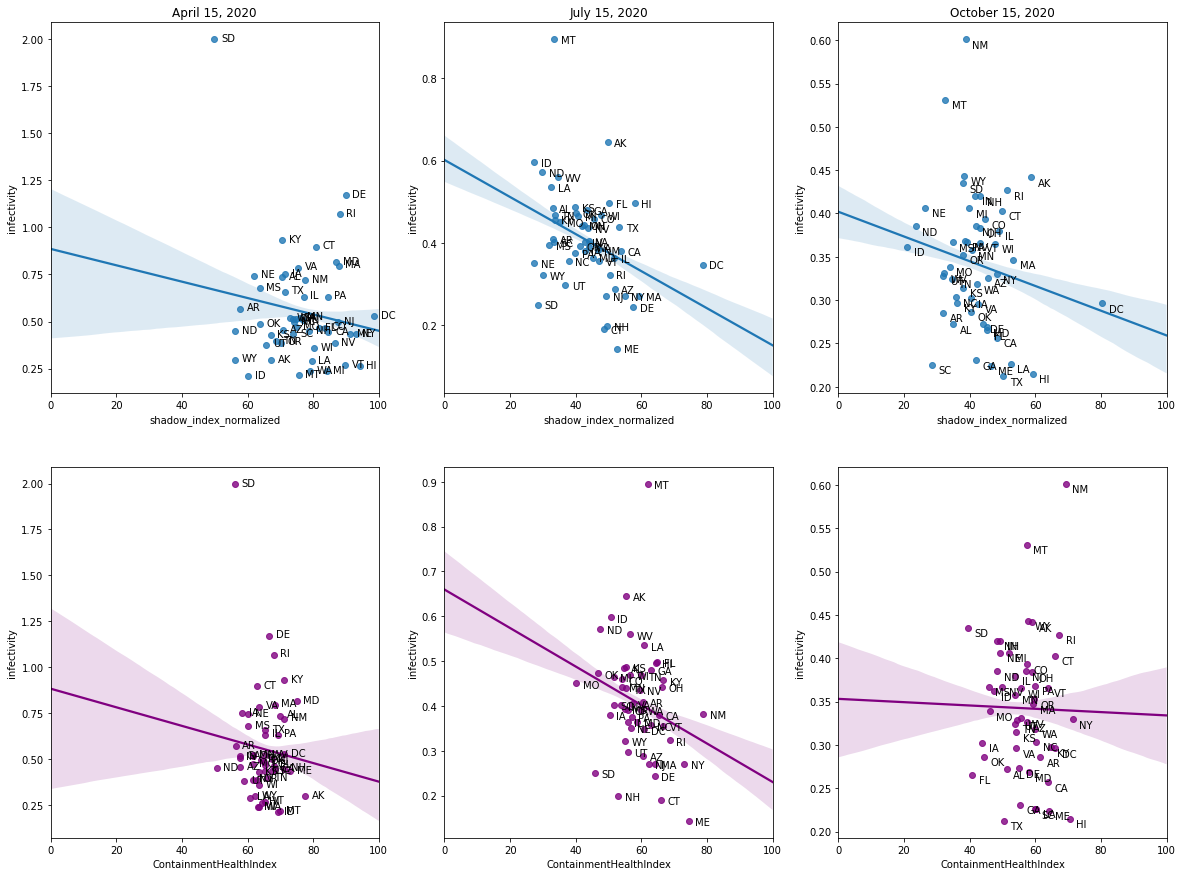

In [ ]:
### READY FOR FINAL PLOT @SHERIDAN GREEN

dates_to_plot = ['2020-04-15', '2020-07-15', '2020-10-15']
date_labels = ['April 15, 2020', 'July 15, 2020', 'October 15, 2020']
colors = ['tab:blue', 'purple']
outcome_measure = 'infectivity'
input_measures = ['shadow_index_normalized', 'ContainmentHealthIndex']

fig,axs = plt.subplots(len(input_measures), len(dates_to_plot), figsize=(20,15))
for i_date,date in enumerate(dates_to_plot):
  for i_input,input in enumerate(input_measures):
    merged_dat_subset = merged_dat.loc[merged_dat['Date']==date]
    axs[i_input][i_date].set_xlim(0,100)
    if i_input==0:
      axs[i_input][i_date].set_title(date_labels[i_date])
    sns.regplot(data=merged_dat.loc[merged_dat['Date']==date], x=input, y=outcome_measure, 
                ax=axs[i_input][i_date], truncate=False, color=colors[i_input], ci=50)
    for dp in merged_dat.loc[merged_dat['Date']==date].iterrows():
      axs[i_input][i_date].text(dp[1][input] + 2, dp[1][outcome_measure] - 0.01, dp[1]['stateabbrev'])
    #axs[i_input][i_date].scatter(merged_dat.loc[merged_dat['Date']==date,input], merged_dat.loc[merged_dat['Date']==date,outcome_measure])

In [ ]:
merged_dat['month'] = (pd.to_datetime(merged_dat['Date'])).dt.to_period('M').astype(str)
print(merged_dat['month'].value_counts())

all_res = []
ind_vars = ['ContainmentHealthIndex', 'shadow_index_normalized', 'newcases_past14_pc', 'newcases_past21_pc', 'newcases_past28_pc']
outcome_vars = ['infectivity', 'newcases_past7_WoWgrowth', 'infectivity_lead7', 'newcases_past7_WoWgrowth_lead7', 'newdeaths_past7_WoWgrowth_lead14', 'newdeaths_past7_WoWgrowth_lead21', 'Rt', 'Rt_lead7']

regression_controls = [
                       'C(month)',
                       'C(ARSRegion) + C(month)',
                       'C(statefips) + C(month)', 
                       'C(statefips) + C(month) + ContainmentHealthIndex', 
                       'C(statefips) + C(month) + newcases_past14_pc + newcases_past21_pc + newcases_past28_pc',
                       'C(statefips) + C(month) + ContainmentHealthIndex + newcases_past14_pc + newcases_past21_pc + newcases_past28_pc'
                       ]
for outcome in outcome_vars:
  all_res = []
  regress_dat = merged_dat.loc[~pd.isna(merged_dat[[outcome] + ind_vars]).any(axis=1)]
  all_res.append(smf.ols(formula=outcome + ' ~ C(statefips) + C(month)', data=regress_dat).fit(cov_type='cluster',cov_kwds={'groups':regress_dat['statefips']}))
  all_res.append(smf.ols(formula=outcome + ' ~ C(statefips) + C(month) + ContainmentHealthIndex', data=regress_dat).fit(cov_type='cluster',cov_kwds={'groups':regress_dat['statefips']}))
  all_res.append(smf.ols(formula=outcome + ' ~ C(statefips) + C(month) + shadow_index_normalized', data=regress_dat).fit(cov_type='cluster',cov_kwds={'groups':regress_dat['statefips']}))
  all_res.append(smf.ols(formula=outcome + ' ~ C(statefips) + C(month) + newcases_past14_pc + newcases_past21_pc + newcases_past28_pc', data=regress_dat).fit(cov_type='cluster',cov_kwds={'groups':regress_dat['statefips']}))
  all_res.append(smf.ols(formula=outcome + ' ~ C(statefips) + C(month) + ContainmentHealthIndex + shadow_index_normalized + newcases_past14_pc + newcases_past21_pc + newcases_past28_pc', data=regress_dat).fit(cov_type='cluster',cov_kwds={'groups':regress_dat['statefips']}))
  base = all_res[0]
  print(summary_col(all_res, regressor_order=['ContainmentHealthIndex', 'shadow_index_normalized', 'newcases_past14_pc', 'newcases_past21_pc', 'newcases_past28_pc'], 
                    drop_omitted=True, stars=True, 
                    info_dict={'N': lambda x:(x.nobs), 'R2':lambda x:(x.rsquared), 'Adj.R2':lambda x:(x.rsquared_adj), 
                              'F':lambda x:(anova_lm(base, x).iloc[1]['F'])}))

2020-12    1581
2020-05    1581
2020-10    1581
2020-08    1581
2020-07    1581
2021-01    1581
2020-03    1581
2020-09    1530
2020-11    1530
2020-04    1530
2020-06    1530
2020-02    1479
2021-02    1275
Name: month, dtype: int64

                        infectivity I infectivity II infectivity III infectivity IIII infectivity IIIII
-------------------------------------------------------------------------------------------------------
ContainmentHealthIndex                -0.0795***                                      -0.0445***       
                                      (0.0183)                                        (0.0125)         
shadow_index_normalized                              -0.0945***                       -0.0919***       
                                                     (0.0204)                         (0.0204)         
newcases_past14_pc                                                   35.5557***       143.3310***      
                                     

In [ ]:
### results_df is final table of all F-tests, p-values, etc.


merged_dat['month'] = (pd.to_datetime(merged_dat['Date'])).dt.to_period('M').astype(str)
print(merged_dat['month'].value_counts())

all_res = []
ind_vars = ['ContainmentHealthIndex', 'shadow_index_normalized', 'newcases_past14_pc', 'newcases_past21_pc', 'newcases_past28_pc']
outcome_vars = ['infectivity', 'newcases_past7_WoWgrowth', 'infectivity_lead7', 'newcases_past7_WoWgrowth_lead7', 'newdeaths_past7_WoWgrowth_lead14', 'newdeaths_past7_WoWgrowth_lead21', 'Rt', 'Rt_lead7']

regression_controls_SDI = [
                       #'C(month)',
                       #'C(month) + ContainmentHealthIndex',
                       #'C(month) + ContainmentHealthIndex + newcases_past14_pc + newcases_past21_pc + newcases_past28_pc',
                       'C(statefips) + C(month)', 
                       'C(statefips) + C(month) + newcases_past14_pc + newcases_past21_pc + newcases_past28_pc',
                       'C(statefips) + C(month) + ContainmentHealthIndex', 
                       'C(statefips) + C(month) + ContainmentHealthIndex + newcases_past14_pc + newcases_past21_pc + newcases_past28_pc'
                       ]
reg_SDI_desc = [
                #'Month FEs',
                #'Month FEs + Containment',
                #'Month FEs + Containment + 14-,21-,28-day cumulative cases per capita',
                'State, month FEs',
                'State, month FEs + 14-,21-,28-day cumulative cases per capita',
                'State, month FEs + Containment',
                'State, month FEs + Containment + 14-,21-,28-day cumulative cases per capita'
]

results_df = None

for outcome in outcome_vars:
  regress_dat = merged_dat.loc[~pd.isna(merged_dat[[outcome] + ind_vars]).any(axis=1)]
  for i_spec,reg_spec in enumerate(regression_controls_SDI):
    base = smf.ols(formula=outcome + ' ~ ' + reg_spec, data=regress_dat).fit(cov_type='cluster',cov_kwds={'groups':regress_dat['statefips']})
    addl = smf.ols(formula=outcome + ' ~ ' + reg_spec + ' + shadow_index_normalized', data=regress_dat).fit(cov_type='cluster',cov_kwds={'groups':regress_dat['statefips']})
    # print('----------------- ', reg_spec)
    # print('Rsq: ', base.rsquared, addl.rsquared)
    # print(addl.params['shadow_index_normalized'])
    # print(addl.conf_int(0.05).loc['shadow_index_normalized'])
    # print(addl.compare_f_test(base))
    row = {
        'Outcome': outcome,
        'Controls': reg_SDI_desc[i_spec],
        'Estimate': addl.params['shadow_index_normalized'],
        'Estimate_95CI_lower': addl.conf_int(0.05).loc['shadow_index_normalized'][0],
        'Estimate_95CI_upper': addl.conf_int(0.05).loc['shadow_index_normalized'][1],
        'R_sq_excluding': base.rsquared,
        'R_sq_including': addl.rsquared,
        'Percent_decr_mse' : 1 - (addl.mse_resid/base.mse_resid),
        'F_stat': addl.compare_f_test(base)[0],
        'F_stat_pvalue': addl.compare_f_test(base)[1]
    }
    for key in row.keys():
      row[key] = [row[key]]
    newrow_df = pd.DataFrame.from_dict(row)
    if results_df is None:
      results_df = newrow_df
    else:
      results_df = pd.concat([results_df, newrow_df])

print(results_df)
    

2020-12    1581
2020-05    1581
2020-10    1581
2020-08    1581
2020-07    1581
2021-01    1581
2020-03    1581
2020-09    1530
2020-11    1530
2020-04    1530
2020-06    1530
2020-02    1479
2021-02    1275
Name: month, dtype: int64


/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:2018: InvalidTestWarning: F test for comparison is likely invalid with robust covariance, proceeding anyway
  InvalidTestWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:2018: InvalidTestWarning: F test for comparison is likely invalid with robust covariance, proceeding anyway
  InvalidTestWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:2018: InvalidTestWarning: F test for comparison is likely invalid with robust covariance, proceeding anyway
  InvalidTestWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:2018: InvalidTestWarning: F test for comparison is likely invalid with robust covariance, proceeding anyway
  InvalidTestWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:2018: InvalidTestWarning: F test for comparison is likely invalid with robust covariance, 

                            Outcome  ...  F_stat_pvalue
0                       infectivity  ...  2.802695e-254
0                       infectivity  ...  4.127877e-262
0                       infectivity  ...  1.726051e-207
0                       infectivity  ...  8.906114e-216
0          newcases_past7_WoWgrowth  ...  8.236247e-239
0          newcases_past7_WoWgrowth  ...  1.923050e-242
0          newcases_past7_WoWgrowth  ...  1.617158e-191
0          newcases_past7_WoWgrowth  ...  1.083277e-196
0                 infectivity_lead7  ...   0.000000e+00
0                 infectivity_lead7  ...   0.000000e+00
0                 infectivity_lead7  ...  1.563650e-226
0                 infectivity_lead7  ...  1.924912e-232
0    newcases_past7_WoWgrowth_lead7  ...   0.000000e+00
0    newcases_past7_WoWgrowth_lead7  ...   0.000000e+00
0    newcases_past7_WoWgrowth_lead7  ...  8.086818e-215
0    newcases_past7_WoWgrowth_lead7  ...  3.635096e-216
0  newdeaths_past7_WoWgrowth_lead14  ...   0.000

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:2018: InvalidTestWarning: F test for comparison is likely invalid with robust covariance, proceeding anyway
  InvalidTestWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:2018: InvalidTestWarning: F test for comparison is likely invalid with robust covariance, proceeding anyway
  InvalidTestWarning)


In [ ]:
#print(results_df.to_latex())
results_df['CI'] = '[' + results_df['Estimate_95CI_lower'].astype(str) + ', ' + results_df['Estimate_95CI_upper'].astype(str) + ']'
print(results_df.loc[results_df['Controls']=='State, month FEs', ['Outcome', 'Estimate', 'CI', 'R_sq_excluding', 'R_sq_including', 'Percent_decr_mse', 'F_stat', 'F_stat_pvalue']].to_latex())

\begin{tabular}{llrlrrrrr}
\toprule
{} &                           Outcome &  Estimate &                                             CI &  R\_sq\_excluding &  R\_sq\_including &  Percent\_decr\_mse &       F\_stat &  F\_stat\_pvalue \\
\midrule
0 &                       infectivity & -0.094474 &   [-0.13436208879419576, -0.05458524101692332] &        0.320018 &        0.363767 &          0.064284 &  1199.621445 &  2.802695e-254 \\
0 &          newcases\_past7\_WoWgrowth & -0.095743 &  [-0.13645956035514617, -0.055025548343343354] &        0.301362 &        0.345344 &          0.062898 &  1125.189684 &  8.236247e-239 \\
0 &                 infectivity\_lead7 & -0.110720 &   [-0.13699492664801335, -0.08444548568142785] &        0.251924 &        0.345378 &          0.124876 &  2513.711552 &   0.000000e+00 \\
0 &    newcases\_past7\_WoWgrowth\_lead7 & -0.112895 &   [-0.13902718219813465, -0.08676365263423307] &        0.231515 &        0.327522 &          0.124878 &  2391.052764 &   0.000

[1.5, 5.5, 9.5, 13.5, 17.5, 21.5, 25.5, 29.5]


Text(0.5, 1.0, 'Effect of Social Distancing Index on Measures of Covid-19 Spread')

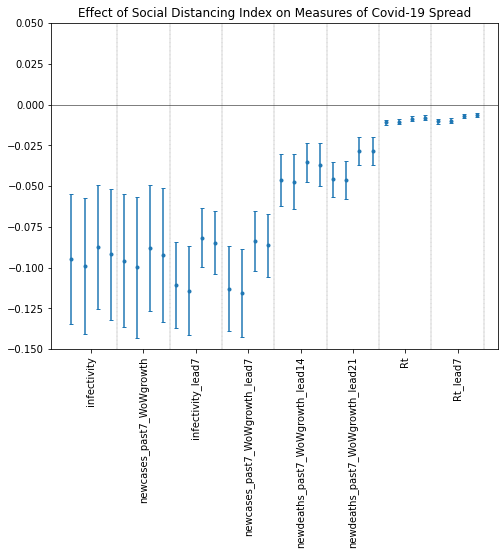

In [ ]:
### READY FOR FINAL PLOT @Sheridan Green
# May need some messing around with explaining the four points

plt.figure(figsize=(8,6))
plt.errorbar(range(len(results_df)), results_df['Estimate'], 
             yerr=results_df['Estimate_95CI_upper'] - results_df['Estimate'],
             marker='.', ls='', capsize=2)
new_ticks = [(len(regression_controls_SDI)-1)/2 + len(regression_controls_SDI)*i for i in range(len(outcome_vars))]
print(new_ticks)
plt.xticks(new_ticks, labels=outcome_vars, rotation=90)
plt.ylim(-0.15, 0.05)
plt.axhline(0, color='black', linewidth=0.5)
for t in new_ticks:
  plt.axvline(t + len(regression_controls_SDI)/2, linewidth=0.25, ls='--', color='black')

plt.title('Effect of Social Distancing Index on Measures of Covid-19 Spread')

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import scipy
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
outcome = 'infectivity_lead7'

def get_test_error(outcome, x_var_excl_states):
  regress_dat = merged_dat.loc[~pd.isna(merged_dat[[outcome] + x_var_excl_states]).any(axis=1)]
  regress_dat['Date_cont'] = pd.to_datetime(regress_dat['Date']).astype(int) / 10**11
  Y = np.matrix(regress_dat[[outcome]])
  X_excl_states = np.matrix(regress_dat[['Date_cont'] + x_var_excl_states])
  statefips_vals = (np.array(regress_dat['statefips'].value_counts().index)).reshape(-1, 1)
  statefips_dummies = preprocessing.OneHotEncoder().fit(statefips_vals).transform(np.matrix(regress_dat['statefips']).T)
  X = scipy.sparse.hstack((X_excl_states, statefips_dummies))
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size = 0.25)
  regr = make_pipeline(SVR(C=1.0, epsilon=0.2))
  regr.fit(X_train, Y_train)
  Y_test_predict = regr.predict(X_test)
  return mean_squared_error(Y_test, Y_test_predict)

for outcome in outcome_vars:
  print('-----------------', outcome)
  print(get_test_error(outcome, ['newcases_past14_pc', 'newcases_past21_pc', 'newcases_past28_pc']))
  print(get_test_error(outcome, ['ContainmentHealthIndex', 'newcases_past14_pc', 'newcases_past21_pc', 'newcases_past28_pc']))
  print(get_test_error(outcome, ['ContainmentHealthIndex', 'shadow_index_normalized', 'newcases_past14_pc', 'newcases_past21_pc', 'newcases_past28_pc']))

----------------- infectivity


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


13.695715292541369


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


9.014525860533778


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


9.014587086818013
----------------- newcases_past7_WoWgrowth


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


9.240097127952676


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


15.361639849201207


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


15.361597262808951
----------------- infectivity_lead7


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


13.695578182293845


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


9.059405105564126


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


9.059367097060687
----------------- newcases_past7_WoWgrowth_lead7


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


9.24010352350176


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


15.36159393157474


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


15.361621429468602
----------------- newdeaths_past7_WoWgrowth_lead14


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.7625008525953383


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


2.4359325492067474


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


2.435921209723728
----------------- newdeaths_past7_WoWgrowth_lead21


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.7624892110512218


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


2.4359148517850144


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


2.4359208660838463
----------------- Rt


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.048941887499278566


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.050373871381032234


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.05037446380281177


In [ ]:
### results_df is final table of all F-tests, p-values, etc.

all_res = []
ind_vars = ['ContainmentHealthIndex', 'shadow_index_normalized', 'newcases_past14_pc', 'newcases_past21_pc', 'newcases_past28_pc']
outcome_vars = ['infectivity', 'newcases_past7_WoWgrowth', 'infectivity_lead7', 'newcases_past7_WoWgrowth_lead7', 'newdeaths_past7_WoWgrowth_lead14', 'newdeaths_past7_WoWgrowth_lead21', 'Rt']

regression_controls_Containment = [
                       'C(statefips) + C(month)', 
                       'C(statefips) + C(month) + newcases_past14_pc + newcases_past21_pc + newcases_past28_pc',
                       'C(statefips) + C(month) + shadow_index_normalized', 
                       'C(statefips) + C(month) + shadow_index_normalized + newcases_past14_pc + newcases_past21_pc + newcases_past28_pc'
                       ]
reg_Containment_desc = [
                'State, month FEs',
                'State, month FEs + Containment',
                'State, month FEs + 14-,21-,28-day cumulative cases per capita',
                'State, month FEs + Containment + 14-,21-,28-day cumulative cases per capita'
]

results_Containment_df = None

for outcome in outcome_vars:
  regress_dat = merged_dat.loc[~pd.isna(merged_dat[[outcome] + ind_vars]).any(axis=1)]
  for i_spec,reg_spec in enumerate(regression_controls_Containment):
    base = smf.ols(formula=outcome + ' ~ ' + reg_spec, data=regress_dat).fit(cov_type='cluster',cov_kwds={'groups':regress_dat['statefips']})
    addl = smf.ols(formula=outcome + ' ~ ' + reg_spec + ' + ContainmentHealthIndex', data=regress_dat).fit(cov_type='cluster',cov_kwds={'groups':regress_dat['statefips']})
    # print('----------------- ', reg_spec)
    # print('Rsq: ', base.rsquared, addl.rsquared)
    # print(addl.params['shadow_index_normalized'])
    # print(addl.conf_int(0.05).loc['shadow_index_normalized'])
    # print(addl.compare_f_test(base))
    row = {
        'Outcome': outcome,
        'Controls': reg_SDI_desc[i_spec],
        'Estimate': addl.params['ContainmentHealthIndex'],
        'Estimate_95CI_lower': addl.conf_int(0.05).loc['ContainmentHealthIndex'][0],
        'Estimate_95CI_upper': addl.conf_int(0.05).loc['ContainmentHealthIndex'][1],
        'R_sq_excluding': base.rsquared,
        'R_sq_including': addl.rsquared,
        'F_stat': addl.compare_f_test(base)[0],
        'F_stat_pvalue': addl.compare_f_test(base)[1]
    }
    for key in row.keys():
      row[key] = [row[key]]
    newrow_df = pd.DataFrame.from_dict(row)
    if results_Containment_df is None:
      results_Containment_df = newrow_df
    else:
      results_Containment_df = pd.concat([results_Containment_df, newrow_df])

print(results_Containment_df)
    

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:2018: InvalidTestWarning: F test for comparison is likely invalid with robust covariance, proceeding anyway
  InvalidTestWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:2018: InvalidTestWarning: F test for comparison is likely invalid with robust covariance, proceeding anyway
  InvalidTestWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:2018: InvalidTestWarning: F test for comparison is likely invalid with robust covariance, proceeding anyway
  InvalidTestWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:2018: InvalidTestWarning: F test for comparison is likely invalid with robust covariance, proceeding anyway
  InvalidTestWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:2018: InvalidTestWarning: F test for comparison is likely invalid with robust covariance, 

                            Outcome  ...  F_stat_pvalue
0                       infectivity  ...   2.883593e-71
0                       infectivity  ...   7.723477e-70
0                       infectivity  ...   2.729349e-24
0                       infectivity  ...   2.598636e-23
0          newcases_past7_WoWgrowth  ...   4.709052e-73
0          newcases_past7_WoWgrowth  ...   5.835100e-70
0          newcases_past7_WoWgrowth  ...   1.390064e-25
0          newcases_past7_WoWgrowth  ...   5.020645e-24
0                 infectivity_lead7  ...   0.000000e+00
0                 infectivity_lead7  ...   0.000000e+00
0                 infectivity_lead7  ...  2.631295e-120
0                 infectivity_lead7  ...  2.035439e-115
0    newcases_past7_WoWgrowth_lead7  ...   0.000000e+00
0    newcases_past7_WoWgrowth_lead7  ...   0.000000e+00
0    newcases_past7_WoWgrowth_lead7  ...  2.315923e-105
0    newcases_past7_WoWgrowth_lead7  ...  2.956690e-101
0  newdeaths_past7_WoWgrowth_lead14  ...  1.2953

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:2018: InvalidTestWarning: F test for comparison is likely invalid with robust covariance, proceeding anyway
  InvalidTestWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:2018: InvalidTestWarning: F test for comparison is likely invalid with robust covariance, proceeding anyway
  InvalidTestWarning)


[1.5, 5.5, 9.5, 13.5, 17.5, 21.5, 25.5]


Text(0.5, 1.0, 'Effect of Containment on Measures of Covid-19 Spread')

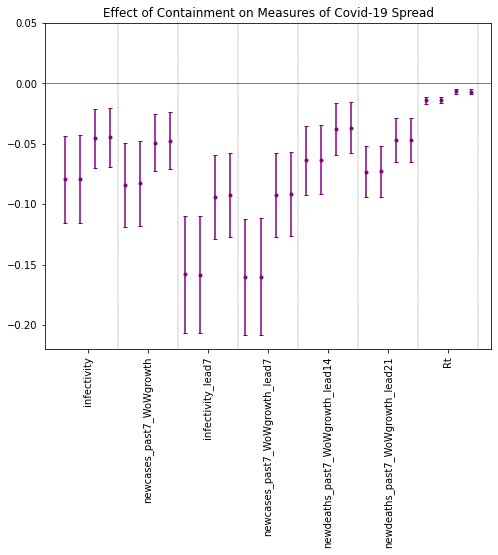

In [ ]:
### READY FOR FINAL PLOT @Sheridan Green
# May need some messing around with explaining the four points

plt.figure(figsize=(8,6))
plt.errorbar(range(len(results_Containment_df)), results_Containment_df['Estimate'], 
             yerr=results_Containment_df['Estimate_95CI_upper'] - results_Containment_df['Estimate'],
             marker='.', ls='', capsize=2, color='purple')
new_ticks = [(len(regression_controls_Containment)-1)/2 + len(regression_controls_Containment)*i for i in range(len(outcome_vars))]
print(new_ticks)
plt.xticks(new_ticks, labels=outcome_vars, rotation=90)
plt.ylim(-0.22, 0.05)
plt.axhline(0, color='black', linewidth=0.5)
for t in new_ticks:
  plt.axvline(t + len(regression_controls_Containment)/2, linewidth=0.25, ls='--', color='black')

plt.title('Effect of Containment on Measures of Covid-19 Spread')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


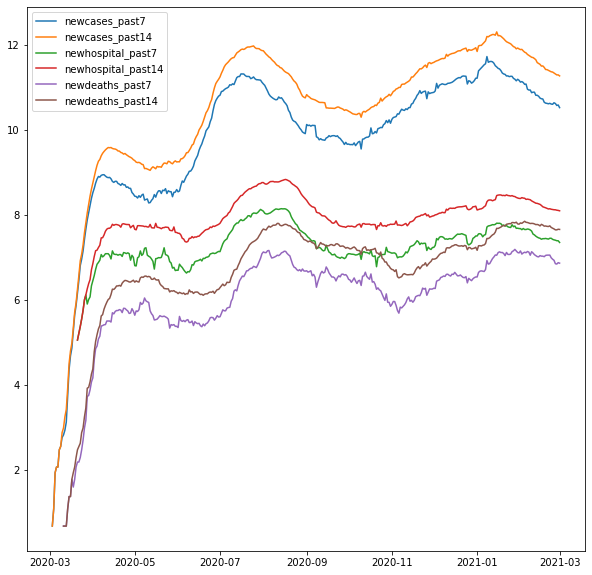

      hospitalizedIncrease  newhospital_past7  newhospital_past14
3160                   0.0                0.0                 0.0
3161                   0.0                0.0                 0.0
3162                   0.0                0.0                 0.0
3163                   0.0                0.0                 0.0
3164                   0.0                0.0                 0.0
3165                   0.0                0.0                 0.0
3166                   0.0                0.0                 0.0
3167                   0.0                0.0                 0.0
3168                   0.0                0.0                 0.0
3169                   0.0                0.0                 0.0
3170                   0.0                0.0                 0.0
3171                   0.0                0.0                 0.0
3172                   0.0                0.0                 0.0
3173                   0.0                0.0                 0.0
3174      

In [ ]:
### OUTDATED

fips_bucket = [6, 12]
plt.figure(figsize=(10,10))
s = dat.loc[dat['statefips']==fips_bucket[1]]
to_plot = ['newcases_past7', 'newcases_past14', 'newhospital_past7', 'newhospital_past14', 'newdeaths_past7', 'newdeaths_past14']
plt.plot(pd.to_datetime(s['date']), np.log(s[to_plot]))
plt.legend(to_plot)
plt.show()
print(s[['hospitalizedIncrease', 'newhospital_past7', 'newhospital_past14']].head(50))

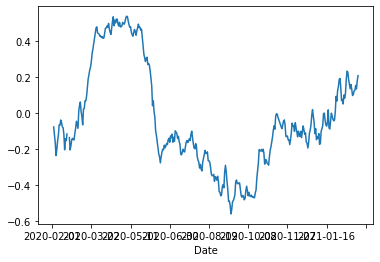

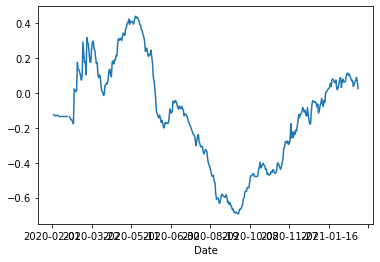

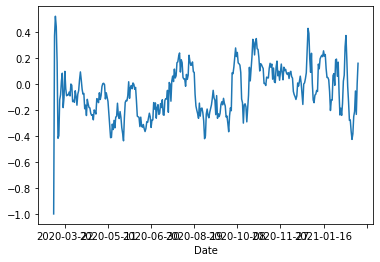

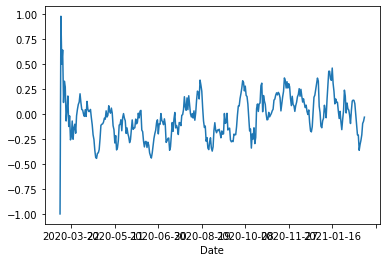

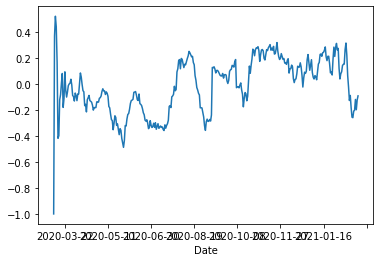

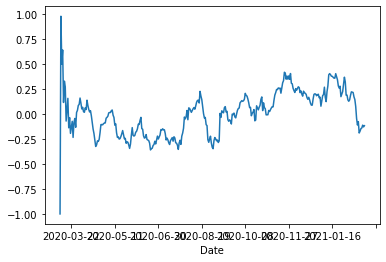

In [ ]:
### EXPLORE CORRELATIONS OVER TIME, OUTDATED

#plt.figure(figsize=(10,10))
#merged_dat.groupby(['Date', 'statename'])['newcases_past7_pc'].mean().unstack().plot(ax=plt.gca())
plt.figure()
merged_dat.groupby(['Date'])[['newcases_past7_pc', 'shadow_index_normalized']].corr().unstack()['newcases_past7_pc']['shadow_index_normalized'].plot()

plt.figure()
merged_dat.groupby(['Date'])[['newcases_past7_pc', 'ContainmentHealthIndex']].corr().unstack()['newcases_past7_pc']['ContainmentHealthIndex'].plot()

plt.figure()
merged_dat.groupby(['Date'])[['newcases_past7_WoWgrowth', 'shadow_index_normalized']].corr().unstack()['newcases_past7_WoWgrowth']['shadow_index_normalized'].plot()

plt.figure()
merged_dat.groupby(['Date'])[['newcases_past7_WoWgrowth', 'ContainmentHealthIndex']].corr().unstack()['newcases_past7_WoWgrowth']['ContainmentHealthIndex'].plot()

plt.figure()
merged_dat.groupby(['Date'])[['infectivity', 'shadow_index_normalized']].corr().unstack()['infectivity']['shadow_index_normalized'].plot()

plt.figure()
merged_dat.groupby(['Date'])[['infectivity', 'ContainmentHealthIndex']].corr().unstack()['infectivity']['ContainmentHealthIndex'].plot()

# plt.figure()
# merged_dat.groupby(['Date'])[['newcases_past7_pc', 'adherence_ratio']].corr().unstack()['newcases_past7_pc']['adherence_ratio'].plot()

# plt.figure()
# merged_dat.groupby(['Date'])[['newcases_past7_pc', 'adherence_gap']].corr().unstack()['newcases_past7_pc']['adherence_gap'].plot()